# Lab 4

## import python libs and connect to database

In [46]:
import pandas
import configparser
import psycopg2

In [47]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']


In [48]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                        )

In [49]:
cur = conn.cursor()

## Q1

In [50]:
sql_q1 = """
        select * from gp5.student
        """

In [51]:
df = pandas.read_sql_query(sql_q1,conn)
df[:]

,student_email,student_name,student_major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,IA
3,s4@jmu.edu,s4,IA
4,s5@jmu.edu,s5,IA


## Q2

In [52]:
sql_q2 = """
        select gp5.professor.professor_name,
        gp5.course.course_name
        from gp5.professor
        inner join gp5.course
        on gp5.professor.professor_email = gp5.course.professor_email
        
        """

In [53]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,professor_name,course_name
0,Xuebin wei,data mining
1,Noel Hendrickson,counterfactual reasoning
2,Kathleen Moore,hypothesis testing
3,Robert Raab,introduction to homeland security
4,new professor,new_course
5,new_professor2,new_course2


## Q3

In [54]:
sql_q3 = """
        select course_number,
        count(course_number) as enrolled
        from gp5.enroll_list
        group by course_number
        order by enrolled desc
        """

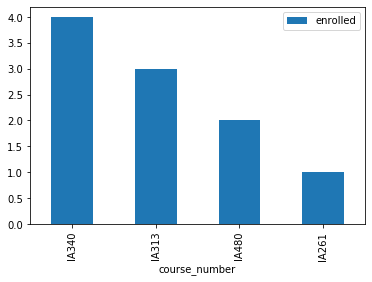

In [55]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y = 'enrolled', x = 'course_number')

## Q4

In [56]:
sql_q4 = """
        select gp5.professor.professor_name,
        count(gp5.course.course_name) as teaching_number
        from gp5.professor
        inner join gp5.course
        on gp5.professor.professor_email = gp5.course.professor_email
        group by professor.professor_name
        order by teaching_number desc
        """

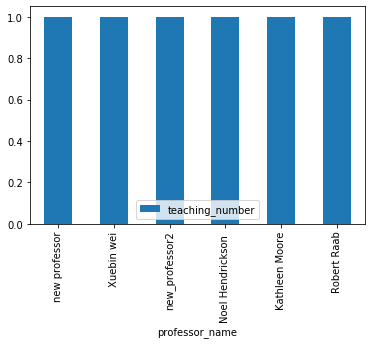

In [57]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y = 'teaching_number', x = 'professor_name')

## Q5

In [72]:
sql_q5_professor = """
                    insert into gp5.professor(professor_email,professor_name,office)
                    values('{}','{}','{}')
                    """.format('new_professor3@jmu.edu','new_professor3','new_office') 
                    

In [73]:
cur.execute(sql_q5_professor)

In [71]:
#cur.execute('ROLLBACK')

In [74]:
conn.commit()

In [75]:
df = pandas.read_sql_query('select * from gp5.professor',conn)
df[:]

,professor_email,professor_name,office
0,weixx@jmu.edu,Xuebin wei,hhs112
1,hendrinx@jmu.edu,Noel Hendrickson,None
2,raabrw@jmu.edu,Robert Raab,isat/cs156
3,teateaa@jmu.edu,Anthony teate,isat/cs126
4,moore8ka@jmu.edu,Kathleen Moore,isat/cs116
5,new_ia@jmu.edu,new professor,new_offce
6,new_professor2@jmu.edu,new_professor2,new_office
7,new_professor3@jmu.edu,new_professor3,new_office


In [78]:
sql_q5_course = """
                    insert into gp5.course(course_number,course_name,room_number,professor_email)
                    values('{}','{}','{}','{}')
                    """.format('new_num3','new_course3','new_room3','new_professor3@jmu.edu') 

In [79]:
cur.execute(sql_q5_course)

In [77]:
#cur.execute('ROLLBACK')

In [80]:
conn.commit()

In [81]:
df = pandas.read_sql_query('select * from gp5.course',conn)
df[:]

,course_number,course_name,room_number,professor_email
0,IA340,data mining,online,weixx@jmu.edu
1,IA313,counterfactual reasoning,isat/cs148,hendrinx@jmu.edu
2,IA261,hypothesis testing,isat/cs348,moore8ka@jmu.edu
3,IA480,introduction to homeland security,online,raabrw@jmu.edu
4,new_number,new_course,"new_room,",new_ia@jmu.edu
5,new_num2,new_course2,new_room2,new_professor2@jmu.edu
6,new_num3,new_course3,new_room3,new_professor3@jmu.edu


## Q6

In [95]:
sql_q6_course = """
                update gp5.course
                set professor_email = '{}'
                where professor_email = '{}'
                """.format('new_ia2@jmu.edu', 'weixx@jmu.edu')

In [96]:
cur.execute(sql_q6_course)

In [94]:
#cur.execute('ROLLBACK')

In [97]:
conn.commit()

In [98]:
df = pandas.read_sql_query('select * from gp5.course',conn)
df[:]

,course_number,course_name,room_number,professor_email
0,IA313,counterfactual reasoning,isat/cs148,hendrinx@jmu.edu
1,IA261,hypothesis testing,isat/cs348,moore8ka@jmu.edu
2,IA480,introduction to homeland security,online,raabrw@jmu.edu
3,new_number,new_course,"new_room,",new_ia@jmu.edu
4,new_num2,new_course2,new_room2,new_professor2@jmu.edu
5,new_num3,new_course3,new_room3,new_professor3@jmu.edu
6,IA340,data mining,online,new_ia2@jmu.edu


In [99]:
sql_q6_professor = """
                    delete from gp5.professor
                    where professor_email = '{}'
                    """.format('weixx@jmu.edu')

In [100]:
cur.execute(sql_q6_professor)

In [101]:
conn.commit()

In [102]:
df = pandas.read_sql_query('select * from gp5.professor',conn)
df[:]

,professor_email,professor_name,office
0,hendrix@jmu.edu,Noel Hendrickson,None
1,moore8ka@jmu.edu,Kathleen Moore,isat/cs116
2,new_ia@jmu.edu,new_professor,new_office
3,new_professor2@jmu.edu,new_professor2,new_office
4,raabrw@jmu.edu,Robert Raab,isat/cs156
5,teateaa@jmu.edu,Anthony teate,isat/cs126


## close connection

In [103]:
cur.close()
conn.close()